gen	nevals	avg     	std   	min      	max    
0  	50    	0.466148	2.0979	0.0146122	15.1274
1  	34    	0.095803	0.0853238	0.0146122	0.553814
2  	33    	0.0517789	0.0321909	0.0142205	0.173288
3  	37    	0.0301223	0.019151 	0.0125232	0.111061
4  	26    	0.0195341	0.0168561	0.0125232	0.131659
5  	33    	0.0143297	0.00179882	0.0125232	0.0245997
6  	34    	0.0166334	0.0161345 	0.0125232	0.120381 
7  	20    	0.01577  	0.0146089 	0.0110788	0.0952324
8  	26    	0.0246661	0.0762931 	0.0110788	0.555556 
9  	19    	0.0134854	0.00997921	0.0107527	0.0830734
10 	18    	0.0119726	0.00199176	0.010395 	0.0224057
11 	34    	0.0117842	0.00300769	0.010395 	0.027248 
12 	27    	0.0141043	0.0154726 	0.010395 	0.0960813
13 	24    	0.015285 	0.0171408 	0.010395 	0.0960813
14 	28    	0.0140534	0.0171954 	0.010395 	0.121212 
15 	20    	0.0138711	0.0172009 	0.010395 	0.114679 
16 	19    	0.0135521	0.0127692 	0.010395 	0.0776053
17 	35    	0.0113067	0.00426725	0.010395 	0.03861  
18 	33    	0.0126913	0.00992522	0.0

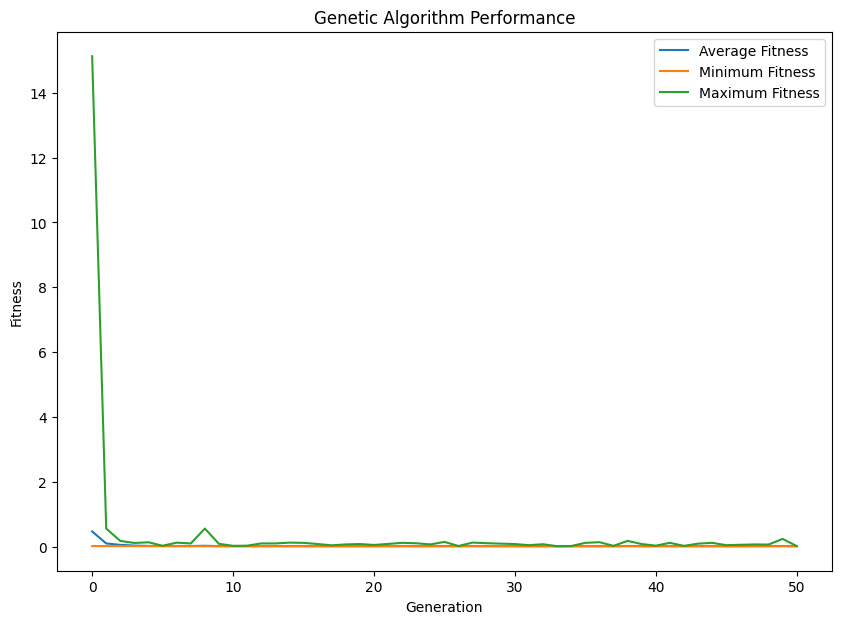

In [7]:
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import numpy


# Problem constants:
TARGET_OUTPUT_TEMP = 150  # Target temperature in Celsius
MAX_FUEL_RATE = 10        # Maximum fuel rate in liters per hour
MAX_AIR_INTAKE = 20       # Maximum air intake in cubic meters per hour
MAX_WATER_FEED = 500      # Maximum water feed in liters per hour

# Fitness function:
def evaluate(individual):
    fuel_rate, air_intake, water_feed = individual
    efficiency = simulate_boiler(fuel_rate, air_intake, water_feed)
    fuel_consumption = fuel_rate / efficiency
    return (fuel_consumption,)

# Boiler simulation dummy function:
def simulate_boiler(fuel_rate, air_intake, water_feed):
    # Dummy simulation logic for efficiency:
    return 100 - (fuel_rate + air_intake / MAX_AIR_INTAKE * 50 + water_feed / MAX_WATER_FEED * 50)

# Genetic Algorithm setup:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_fuel", random.uniform, 1, MAX_FUEL_RATE)
toolbox.register("attr_air", random.uniform, 1, MAX_AIR_INTAKE)
toolbox.register("attr_water", random.uniform, 1, MAX_WATER_FEED)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_fuel, toolbox.attr_air, toolbox.attr_water), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=[1, 1, 1], up=[MAX_FUEL_RATE, MAX_AIR_INTAKE, MAX_WATER_FEED], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Running the GA:
population = toolbox.population(n=50)
hall_of_fame = tools.HallOfFame(maxsize=1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

result, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, halloffame=hall_of_fame, verbose=True)

# Plotting the results
gen = log.select("gen")
avg = log.select("avg")
min_ = log.select("min")
max_ = log.select("max")

plt.figure(figsize=(10, 7))
plt.plot(gen, avg, label='Average Fitness')
plt.plot(gen, min_, label='Minimum Fitness')
plt.plot(gen, max_, label='Maximum Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm Performance')
plt.legend()
plt.show()
